# 3-3-Facet

## 1. Figure & Subplots

### 1-1.  Figure & Axes

**1-3. Python과 Matplotlib** 에서 이미 살펴보았기에 가볍게만 보겠습니다.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

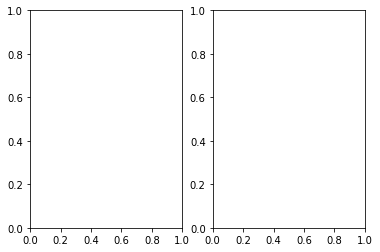

In [2]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax = fig.add_subplot(122)
plt.show()

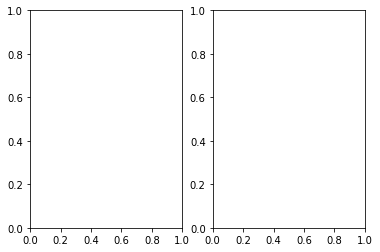

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plt.show()

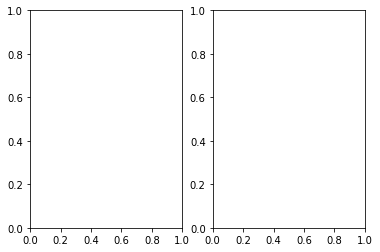

In [4]:
fig, axes = plt.subplots(1, 2) # plt.subplots() 를 사용할 때는 이 방법 선호 (axes)

#axes[0]
#axes[1]

plt.show()

### 1-2. Figure Color

하얀 배경의 내용일 떄 차트와 배경을 구분하기 위해 차트 배경 색을 조정할 수 있습니다.

- `fig.set_facecolor()`

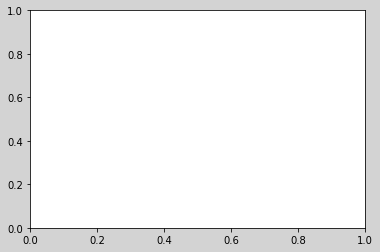

In [5]:
fig, ax = plt.subplots()
fig.set_facecolor('lightgray')
plt.show()

## 2. Figure & Ax Properties

### 2-1. DPI

- `dpi` : Dots per Inch

DPI는 인치에 해당하는 dot 수를 정하는 인자로 **해상도**를 의미합니다. 기본값은 100입니다.

150, 200, 300 값 등을 조정하며 원하는 해상도로 출력할 수 있습니다.

값이 커질수록 차트를 그리는 속도는 느려진다.

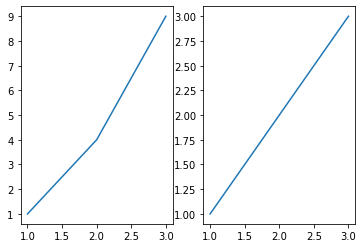

In [6]:
fig = plt.figure() # default: 100
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

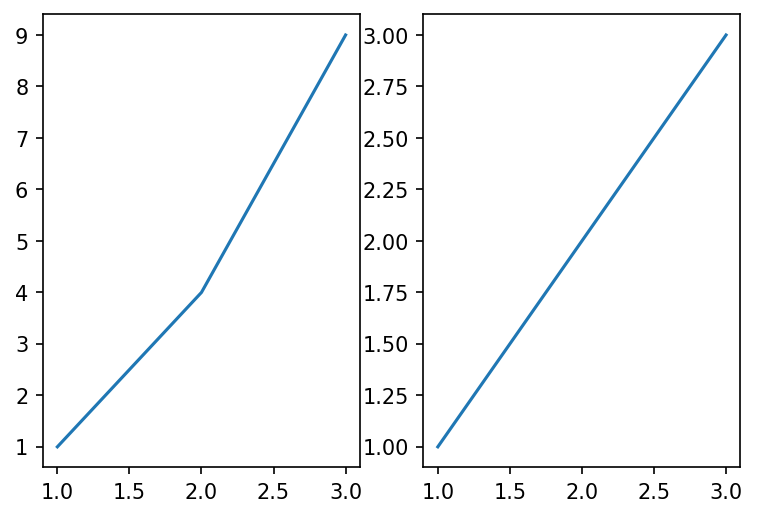

In [7]:
fig = plt.figure(dpi=150) # 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

In [8]:
# 차트를 저장할 때 높은 해상도를 지정 (png 파일로 저장됨)
fig.savefig('file_name', dpi=150)

### 2-2. Sharex, Sharey

- `sharex`, `sharey`

개별 ax에 대해서나 `subplots` 함수를 사용할 때는 `sharex`, `sharey`를 사용하여 축을 공유할 수 있습니다.

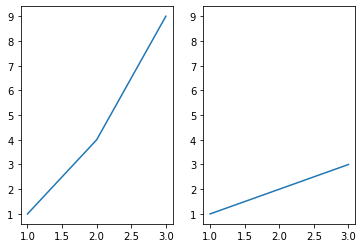

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3], [1, 4, 9])
ax2 = fig.add_subplot(122, sharey=ax1) # 방법 1: sharey=ax1
ax2.plot([1, 2, 3], [1, 2, 3])
plt.show()

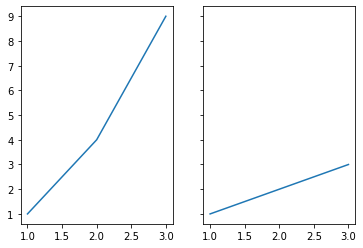

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True) # 방법 2: sharey=True

axes[0].plot([1, 2, 3], [1, 4, 9])
axes[1].plot([1, 2, 3], [1, 2, 3])
plt.show()

### 2-3. squeeze와 flatten

- `squeeze`

`subplots()`로 생성하면 기본적으로 다음과 같이 서브플롯 ax 배열이 생성됩니다.

- 1 x 1 : 객체 1개 (`ax`)
- 1 x N 또는 N x 1 : 길이 N 배열 (`axes[i]`)
- N x M : N by M 배열 (`axes[i][j]`)

numpy ndarray에서 각각 차원이 0, 1, 2로 나타납니다. 
이렇게 되면 경우에 따라 반복문을 사용할 수 있거나, 없거나로 구분됩니다.

`squeeze`를 사용하면 항상 2차원으로 배열을 받을 수 있고, 가변 크기에 대해 반복문을 사용하기에 유용합니다.

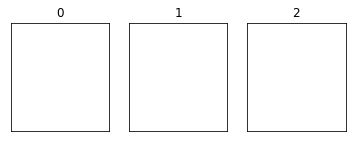

In [11]:
n, m = 1, 3

fig, axes = plt.subplots(n, m, squeeze=False, figsize=(m*2, n*2))
idx = 0
for i in range(n):
    for j in range(m):
        axes[i][j].set_title(idx) # 이차원 배열 indexing
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        idx+=1

plt.show()

`plt.subplots()`나 `plt.gca()`로 받는 ax 리스트는 numpy ndarray로 전달됩니다. 

그렇기에 1중 반복문을 쓰고 싶다면 `flatten()` 메서드를 사용할 수 있습니다.

shape 1:  (2, 3)
shape 2:  (6,)


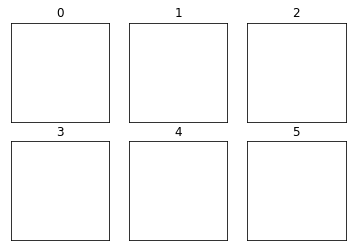

In [12]:
n, m = 2, 3

fig, axes = plt.subplots(n, m, figsize=(m*2, n*2))

print('shape 1: ', axes.shape)
print('shape 2: ', axes.flatten().shape)

for i, ax in enumerate(axes.flatten()): # flatten()
    ax.set_title(i)
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

### 2-4. aspect

- `aspect`
- 비율을 의미

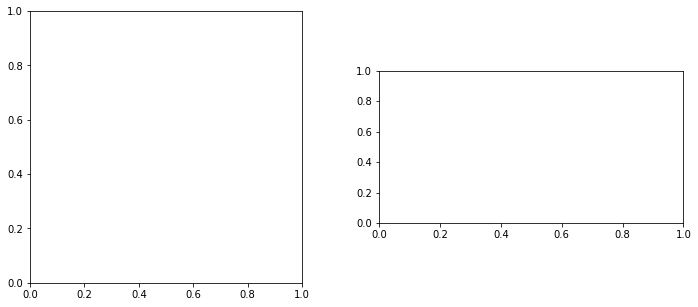

In [13]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, aspect=1)
ax2 = fig.add_subplot(122, aspect=0.5) # x:y = 1:0.5
plt.show()

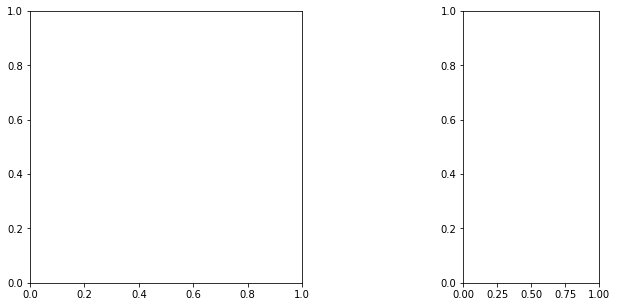

In [14]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, aspect=1)
ax2 = fig.add_subplot(122, aspect=2) # x:y = 1:2
plt.show()

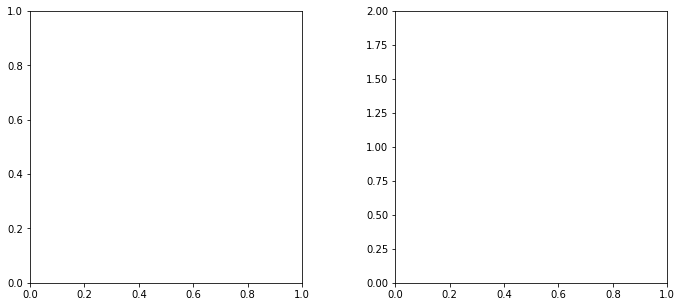

In [15]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, aspect=1)
ax2 = fig.add_subplot(122, aspect=0.5)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 2) # 
plt.show()

## 3. Gridspec

### 3-1. add_gridspec

N by M 그리드에서 슬라이싱으로 서브플롯을 배치할 수 있습니다.

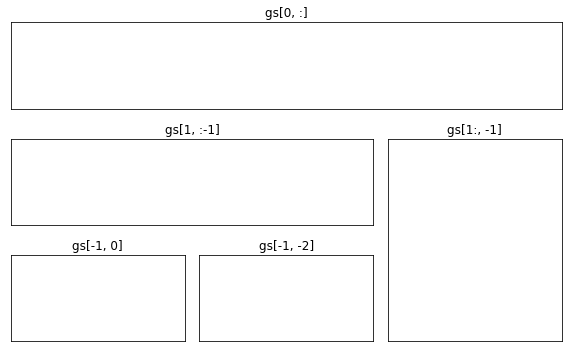

In [16]:
fig = plt.figure(figsize=(8, 5))

gs = fig.add_gridspec(3, 3) # make 3 by 3 grid (row, col)

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(gs[0, :]) 
ax[0].set_title('gs[0, :]')

ax[1] = fig.add_subplot(gs[1, :-1])
ax[1].set_title('gs[1, :-1]')

ax[2] = fig.add_subplot(gs[1:, -1])
ax[2].set_title('gs[1:, -1]')

ax[3] = fig.add_subplot(gs[-1, 0])
ax[3].set_title('gs[-1, 0]')

ax[4] = fig.add_subplot(gs[-1, -2])
ax[4].set_title('gs[-1, -2]')

for ix in range(5):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.tight_layout()
plt.show()

### 3-2. subplot2grid

N x M 그리드에서 시작점에서 delta x, delta y로 표현할 수 있습니다.

> 개인적으로는 add_gridspec을 더 선호합니다.

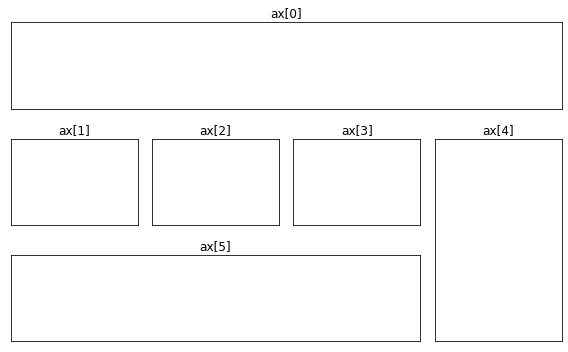

In [17]:

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

### 3-3. add_axes

특정 플롯을 임의의 위치에 만드는 메서드입니다.

위치를 조정하여 그래프를 그리는 게 쉽지는 않기 때문에 추천하지 않습니다.

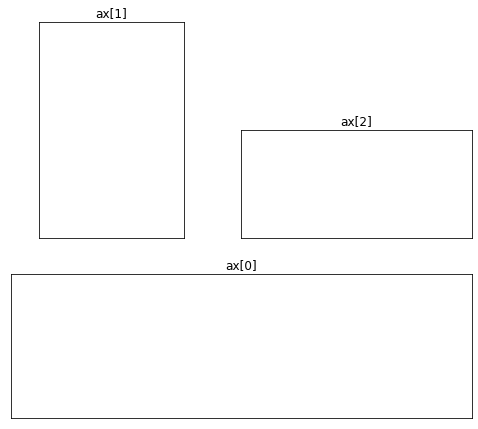

In [18]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.4]) # x, y, dx, dy
ax[1] = fig.add_axes([0.15,0.6,0.25,0.6])
ax[2] = fig.add_axes([0.5,0.6,0.4,0.3])

for ix in range(3):
    ax[ix].set_title('ax[{}]'.format(ix))
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])

plt.show()

### 3-4. inset_axes

미니맵 등 원하는 서브플롯을 그릴 때 사용할 수 있습니다.

표현하고자 하는 메인시각화를 해치지 않는 선에서 사용하는 것을 추천합니다.



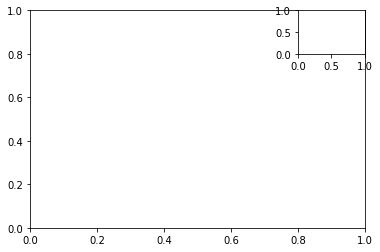

In [19]:
fig, ax = plt.subplots()
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2]) # 
plt.show()

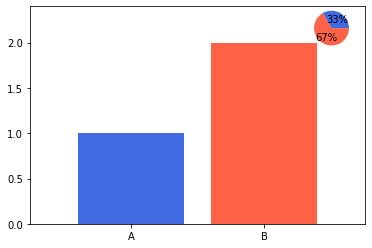

In [20]:
fig, ax = plt.subplots()

color=['royalblue', 'tomato']
ax.bar(['A', 'B'], [1, 2],
       color=color
      )

ax.margins(0.2)
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
axin.pie([1, 2], colors=color, 
         autopct='%1.0f%%')
plt.show()

### 3-5.  make_axes_locatable

일반적으로 colorbar에 많이 사용합니다.

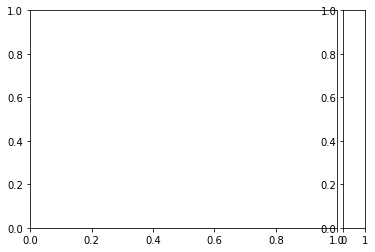

In [21]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

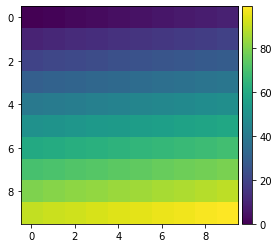

In [22]:
fig, ax = plt.subplots(1, 1)

# 이미지를 보여주는 시각화
# 2D 배열을 색으로 보여줌
im = ax.imshow(np.arange(100).reshape((10, 10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(im, cax=cax)
plt.show()